## READ DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

from keras.models import Sequential
from keras.callbacks import History, ModelCheckpoint

In [ ]:
index_names = ['ENGINE', 'CYCLE']
setting_names = ['SET1', 'SET2', 'SET3']
sensor_names=[ "INLET_TEMP",
"LPC_OUT_TEMP",
"HPC_OUT_TEMP",
"LPT_OUT_TEMP",
"FAN_IN_PR",
"BYPASS-PR",
"HPC_OUT_PR",
"FAN_RPM",
"CORE_RPM",
"ENGINE_PR",
"HPC_OUT",
"FUEL_RATIO",
"FAN_RPM_CORR",
"CORE_RPM_CORR",
"BYPASS RATIO",
"FUEL_RATIO_BURNER",
"ENTHALPY_BLEED",
"FAN_SPEED_REQ",
"CONV_FAN_SPEED",
"HP_AIRFLOW",
"LPC_AIRFLOW" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
data_train1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMaps/train_FD001.txt',sep=" ")
data_train2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMaps/train_FD002.txt',sep=" ")
data_train3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMaps/train_FD003.txt',sep=" ")
data_train4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CMaps/train_FD004.txt',sep=" ")
data_train = pd.concat([data_train1, data_train2, data_train3, data_train4], axis=0)
# Reset index
data_train1.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)
# data_train1.drop(columns=[26,27],inplace=True)
data_train1.columns=col_names

# data_train2.drop(columns=[26,27],inplace=True)
# data_train2.columns=col_names

# data_train3.drop(columns=[26,27],inplace=True)
# data_train3.columns=col_names

# data_train4.drop(columns=[26,27],inplace=True)
# data_train4.columns=col_names


# data_train.reset_index(drop=True, inplace=True)
# data_train.drop(columns=[26,27],inplace=True)
# data_train.columns=col_names
data_train1.head()

,ENGINE,CYCLE,SET1,SET2,SET3,INLET_TEMP,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,FAN_IN_PR,...,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,FUEL_RATIO_BURNER,ENTHALPY_BLEED,FAN_SPEED_REQ,CONV_FAN_SPEED,HP_AIRFLOW,LPC_AIRFLOW
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669


In [ ]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ENGINE             20630 non-null  int64  
 1   CYCLE              20630 non-null  int64  
 2   SET1               20630 non-null  float64
 3   SET2               20630 non-null  float64
 4   SET3               20630 non-null  float64
 5   INLET_TEMP         20630 non-null  float64
 6   LPC_OUT_TEMP       20630 non-null  float64
 7   HPC_OUT_TEMP       20630 non-null  float64
 8   LPT_OUT_TEMP       20630 non-null  float64
 9   FAN_IN_PR          20630 non-null  float64
 10  BYPASS-PR          20630 non-null  float64
 11  HPC_OUT_PR         20630 non-null  float64
 12  FAN_RPM            20630 non-null  float64
 13  CORE_RPM           20630 non-null  float64
 14  ENGINE_PR          20630 non-null  float64
 15  HPC_OUT            20630 non-null  float64
 16  FUEL_RATIO         206

Note: There exists no NAN/NULL data. Moreover, there is no object or non-value data

In [ ]:
data_train1.describe()

,ENGINE,CYCLE,SET1,SET2,SET3,INLET_TEMP,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,FAN_IN_PR,...,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,FUEL_RATIO_BURNER,ENTHALPY_BLEED,FAN_SPEED_REQ,CONV_FAN_SPEED,HP_AIRFLOW,LPC_AIRFLOW
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,20630.00,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,518.67,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,0.00,0.500029,6.131295,9.000636,1.776400e-15,...,0.737569,0.071919,19.076605,0.037506,1.040859e-17,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
data_train1.nunique()

ENGINE                100
CYCLE                 362
SET1                  158
SET2                   13
SET3                    1
INLET_TEMP              1
LPC_OUT_TEMP          310
HPC_OUT_TEMP         3012
LPT_OUT_TEMP         4051
FAN_IN_PR               1
BYPASS-PR               2
HPC_OUT_PR            513
FAN_RPM                53
CORE_RPM             6403
ENGINE_PR               1
HPC_OUT               159
FUEL_RATIO            427
FAN_RPM_CORR           56
CORE_RPM_CORR        6078
BYPASS RATIO         1918
FUEL_RATIO_BURNER       1
ENTHALPY_BLEED         13
FAN_SPEED_REQ           1
CONV_FAN_SPEED          1
HP_AIRFLOW            120
LPC_AIRFLOW          4745
dtype: int64

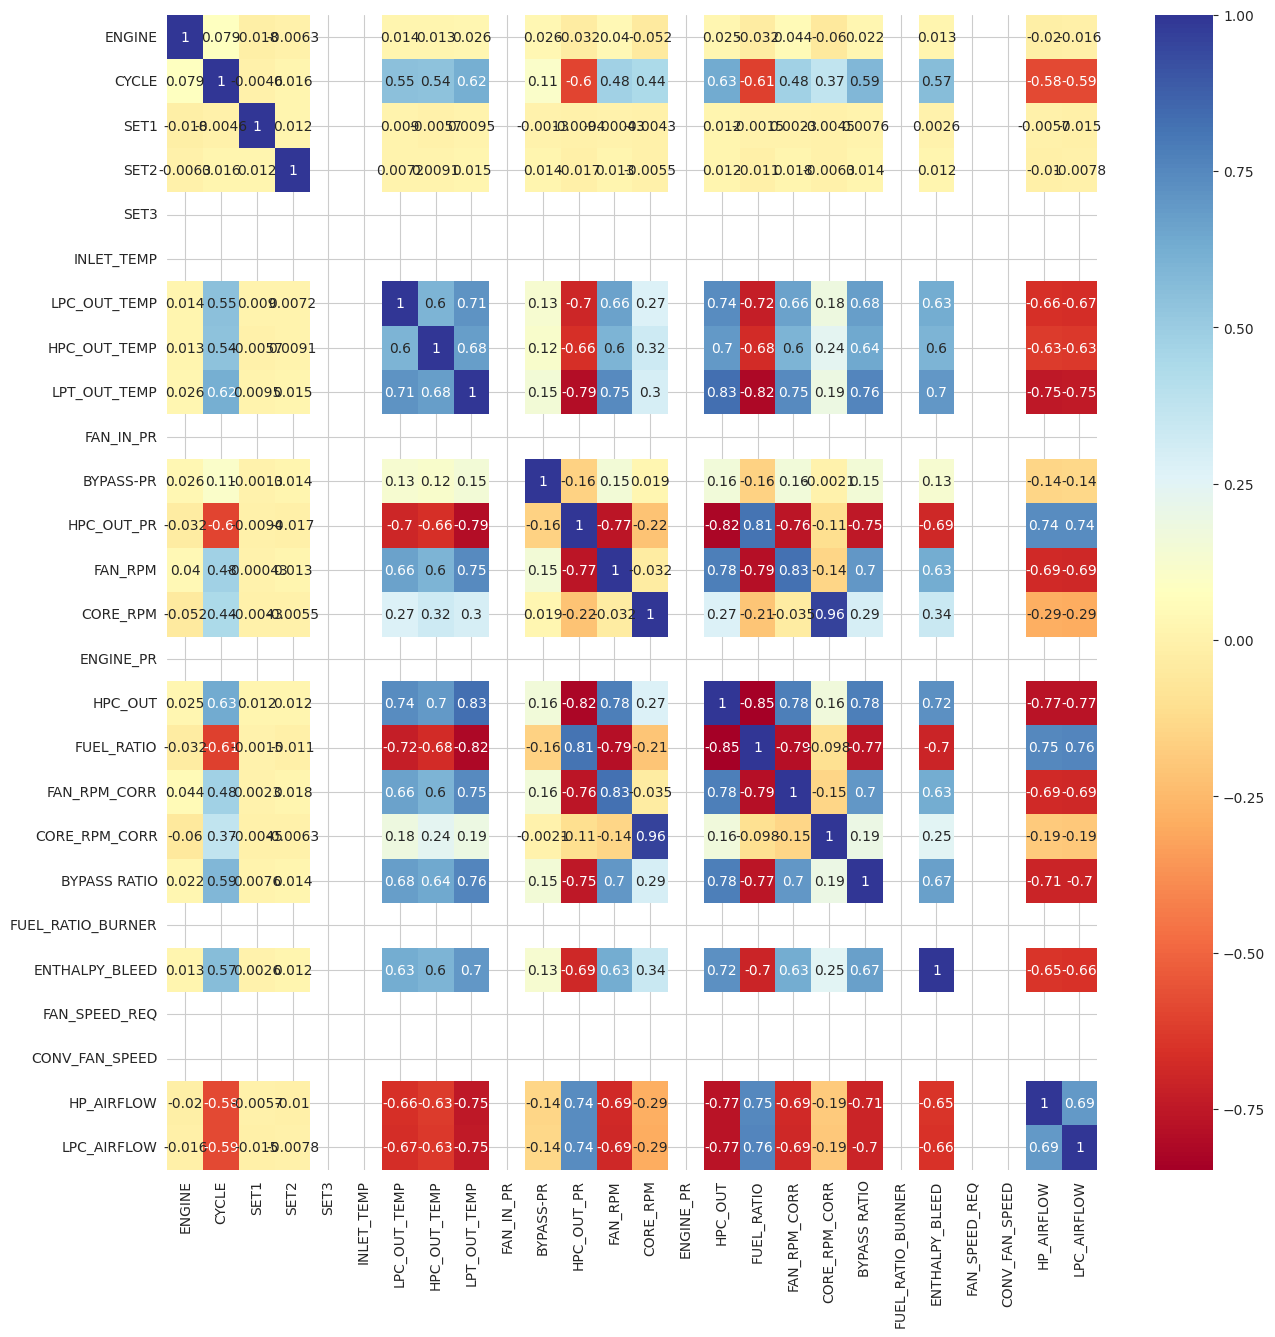

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train1.corr()
plot_kws={"s": 1}
sns.heatmap(data_train1.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
unwanted=[]
for i in data_train1.select_dtypes(include=np.number):
    if data_train1[i].nunique()==1:
        unwanted.append(i)
data_train1.drop(columns=unwanted, inplace=True)


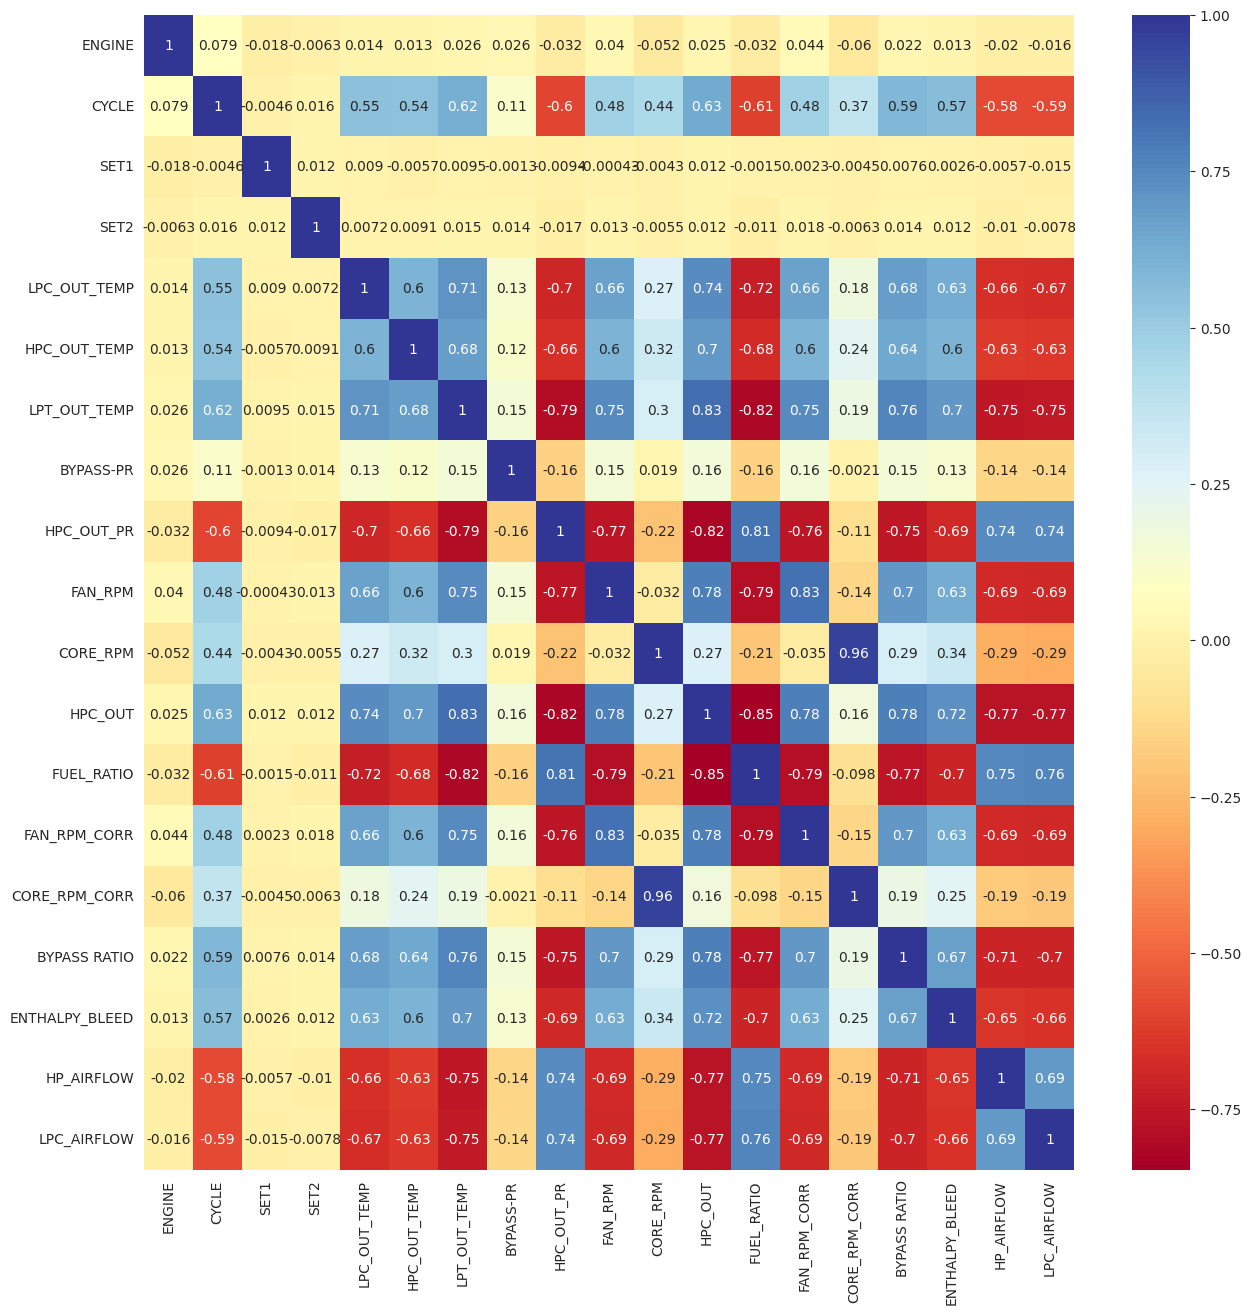

In [ ]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train1.corr()
plot_kws={"s": 1}
sns.heatmap(data_train1.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
data_train1['BYPASS-PR'].unique()


array([21.61, 21.6 ])

In [ ]:
(((data_train1['BYPASS-PR']==21.61).sum())/data_train1.shape[0])*100

98.0319922443044

In [ ]:
(((data_train1['BYPASS-PR']==21.6).sum())/data_train1.shape[0])*100

1.9680077556955888

In [ ]:
data_train1.drop(['BYPASS-PR'],axis=1,inplace=True)

In [ ]:
#OUTLIER TREATMENT FOR TRAIN DATA
# calculate the z-scores for each column
z_scores = data_train1.apply(lambda x: np.abs((x - x.mean()) / x.std()))

# set a threshold for the z-score
threshold = 3

# identify the outliers
outliers = z_scores > threshold

In [ ]:
z_scores = (data_train1 - data_train1.mean()) / data_train1.std()

# Replace values that exceed a certain threshold with the mode
threshold = 2.5
for col in data_train1.columns:
    outlier_mask = z_scores[col].abs() > threshold
    data_train1.loc[outlier_mask, col] = data_train1[col].mask(outlier_mask).mode()[0]

In [ ]:


data_train1['CYCLE'].max()
data_train_RUL = data_train1.groupby(['ENGINE']).agg({'CYCLE':'max'})
data_train_RUL.rename(columns={'CYCLE':'LIFE'},inplace=True)
data_train_RUL.head()



,LIFE
ENGINE,
1,192
2,281
3,179
4,189
5,269


In [ ]:
data_train1=data_train1.merge(data_train_RUL,how='left',on=['ENGINE'])

In [ ]:
data_train1['RUL']=data_train1['LIFE']-data_train1['CYCLE']
data_train1.drop(['LIFE'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
data_train1['RUL'][data_train1['RUL']>125]=125
data_train1.head()

<ipython-input-19-abe0d968928b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train1['RUL'][data_train1['RUL']>125]=125


,ENGINE,CYCLE,SET1,SET2,LPC_OUT_TEMP,HPC_OUT_TEMP,LPT_OUT_TEMP,HPC_OUT_PR,FAN_RPM,CORE_RPM,HPC_OUT,FUEL_RATIO,FAN_RPM_CORR,CORE_RPM_CORR,BYPASS RATIO,ENTHALPY_BLEED,HP_AIRFLOW,LPC_AIRFLOW,RUL
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,125


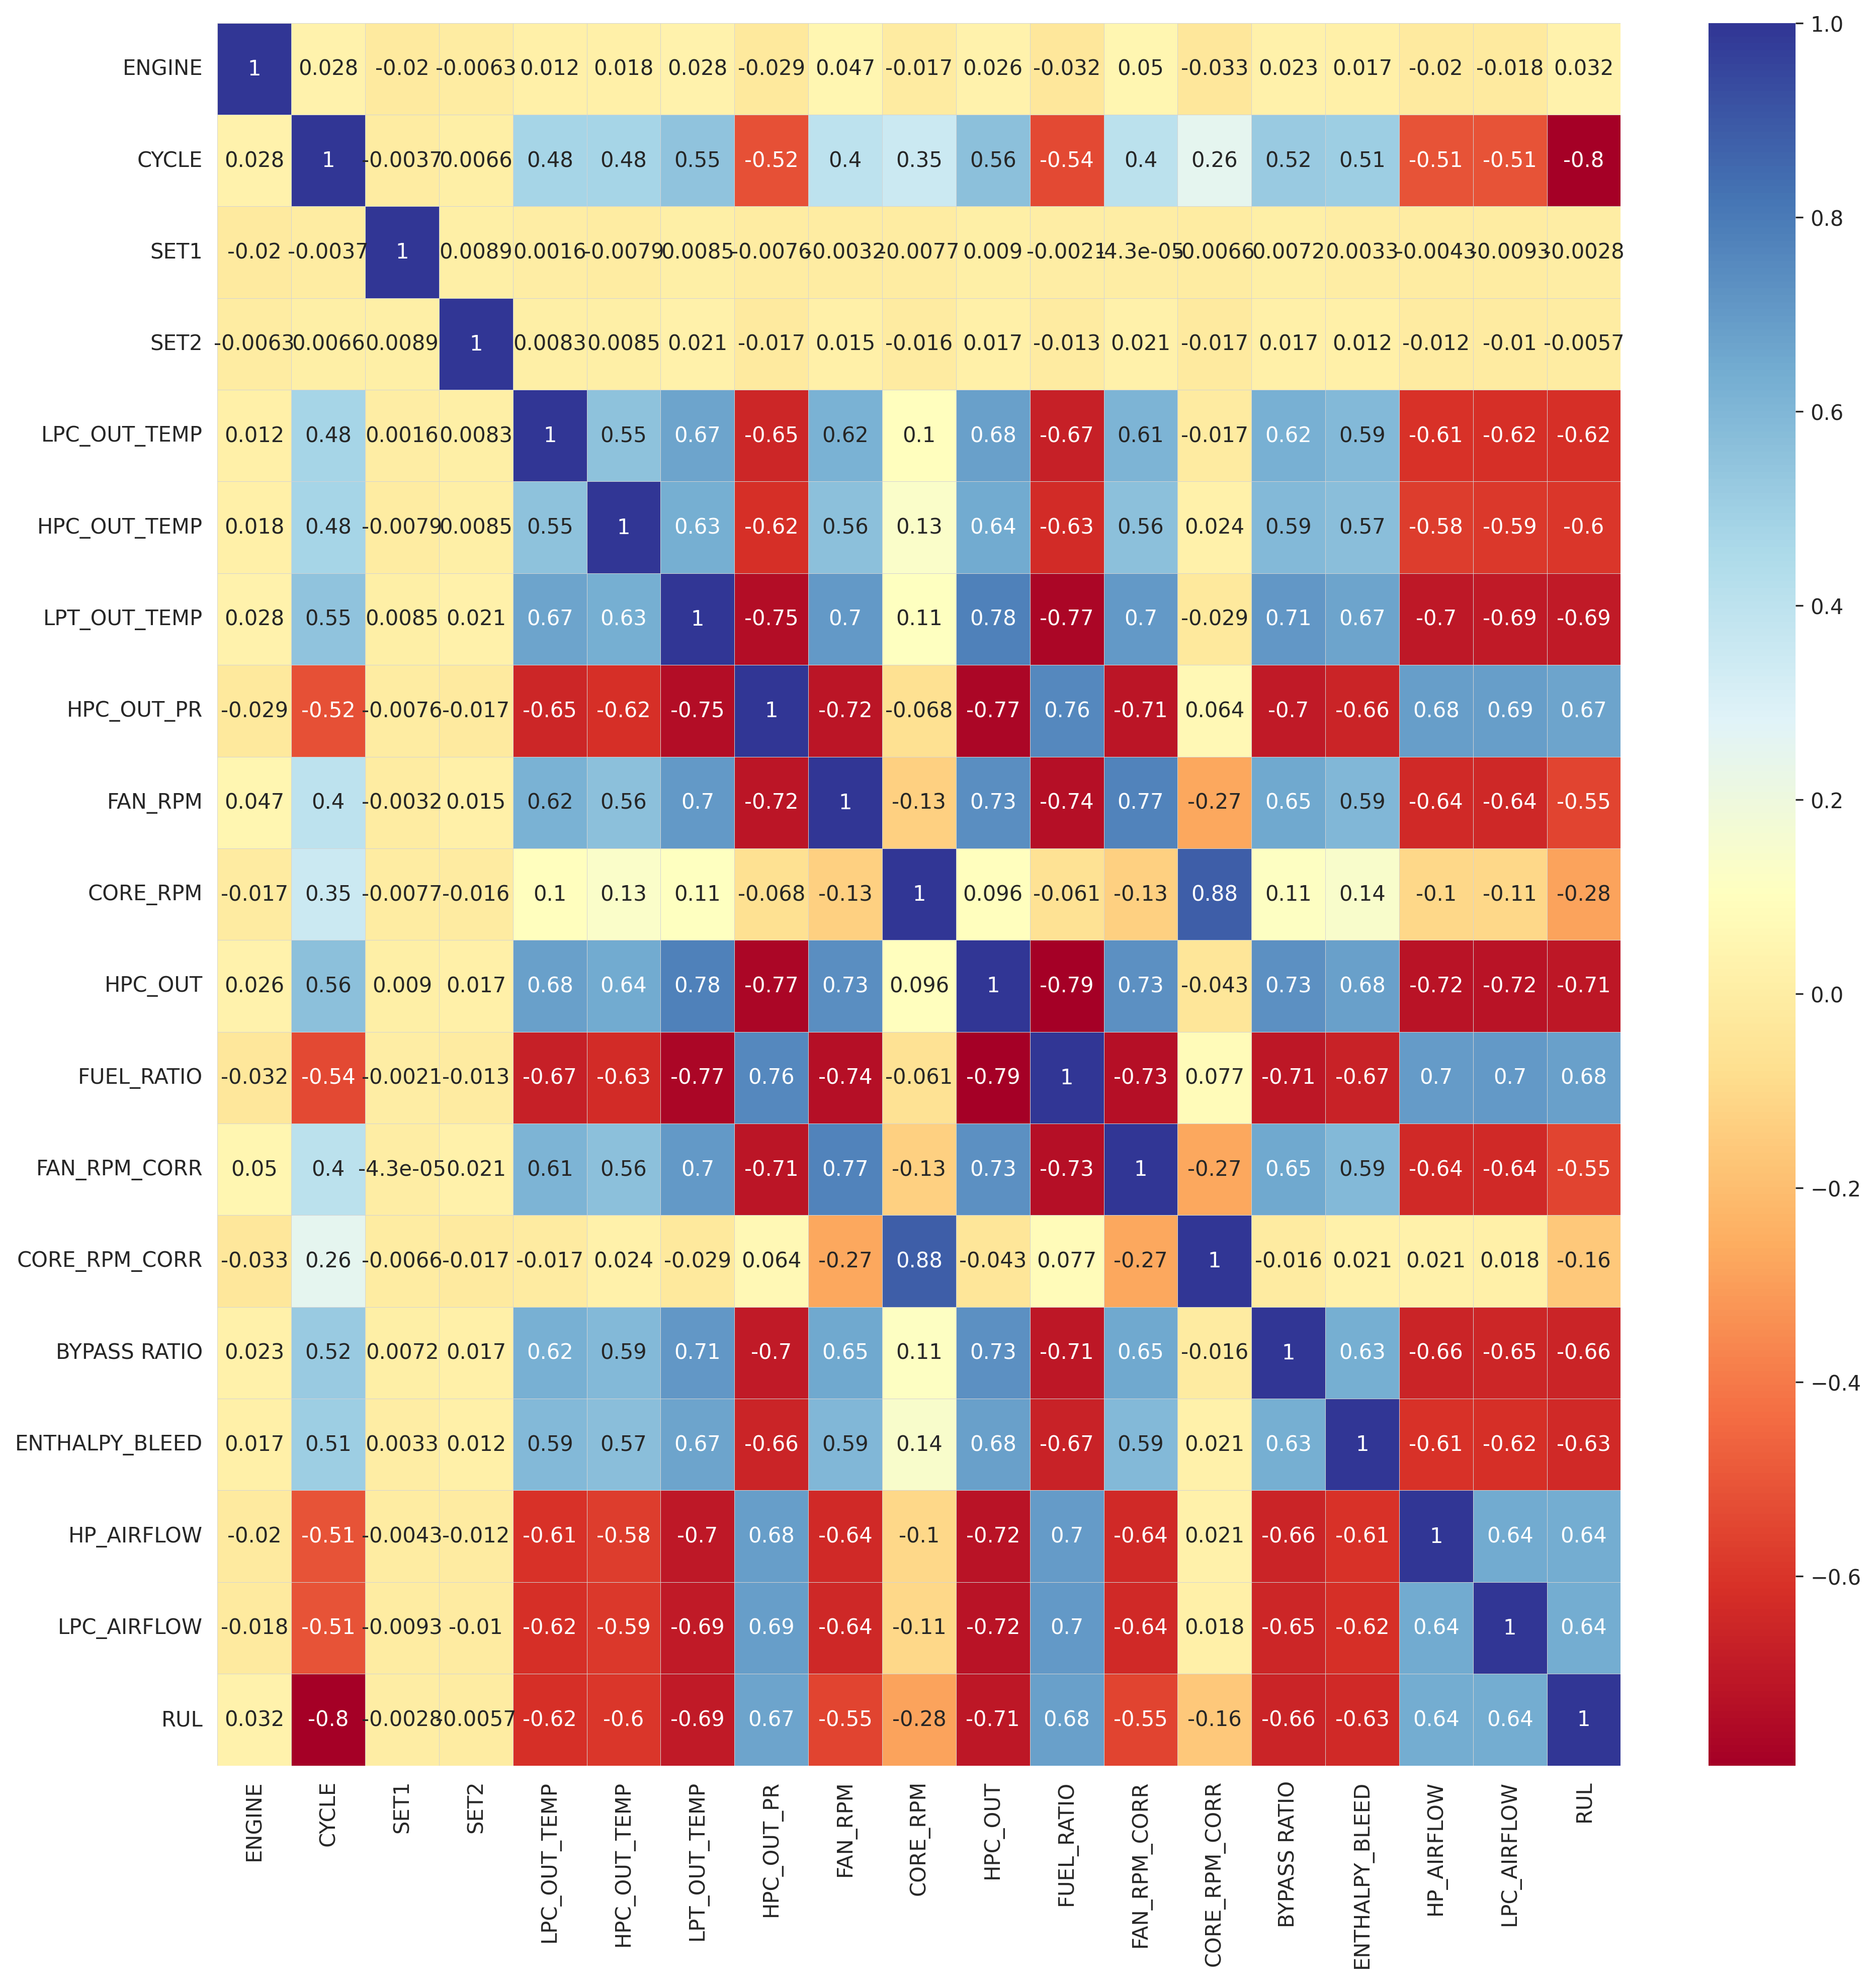

In [ ]:
plt.figure(figsize=(15,15),dpi=300)
sns.heatmap(data_train1.corr(),
            cmap='RdYlBu',
            annot=True,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.show()

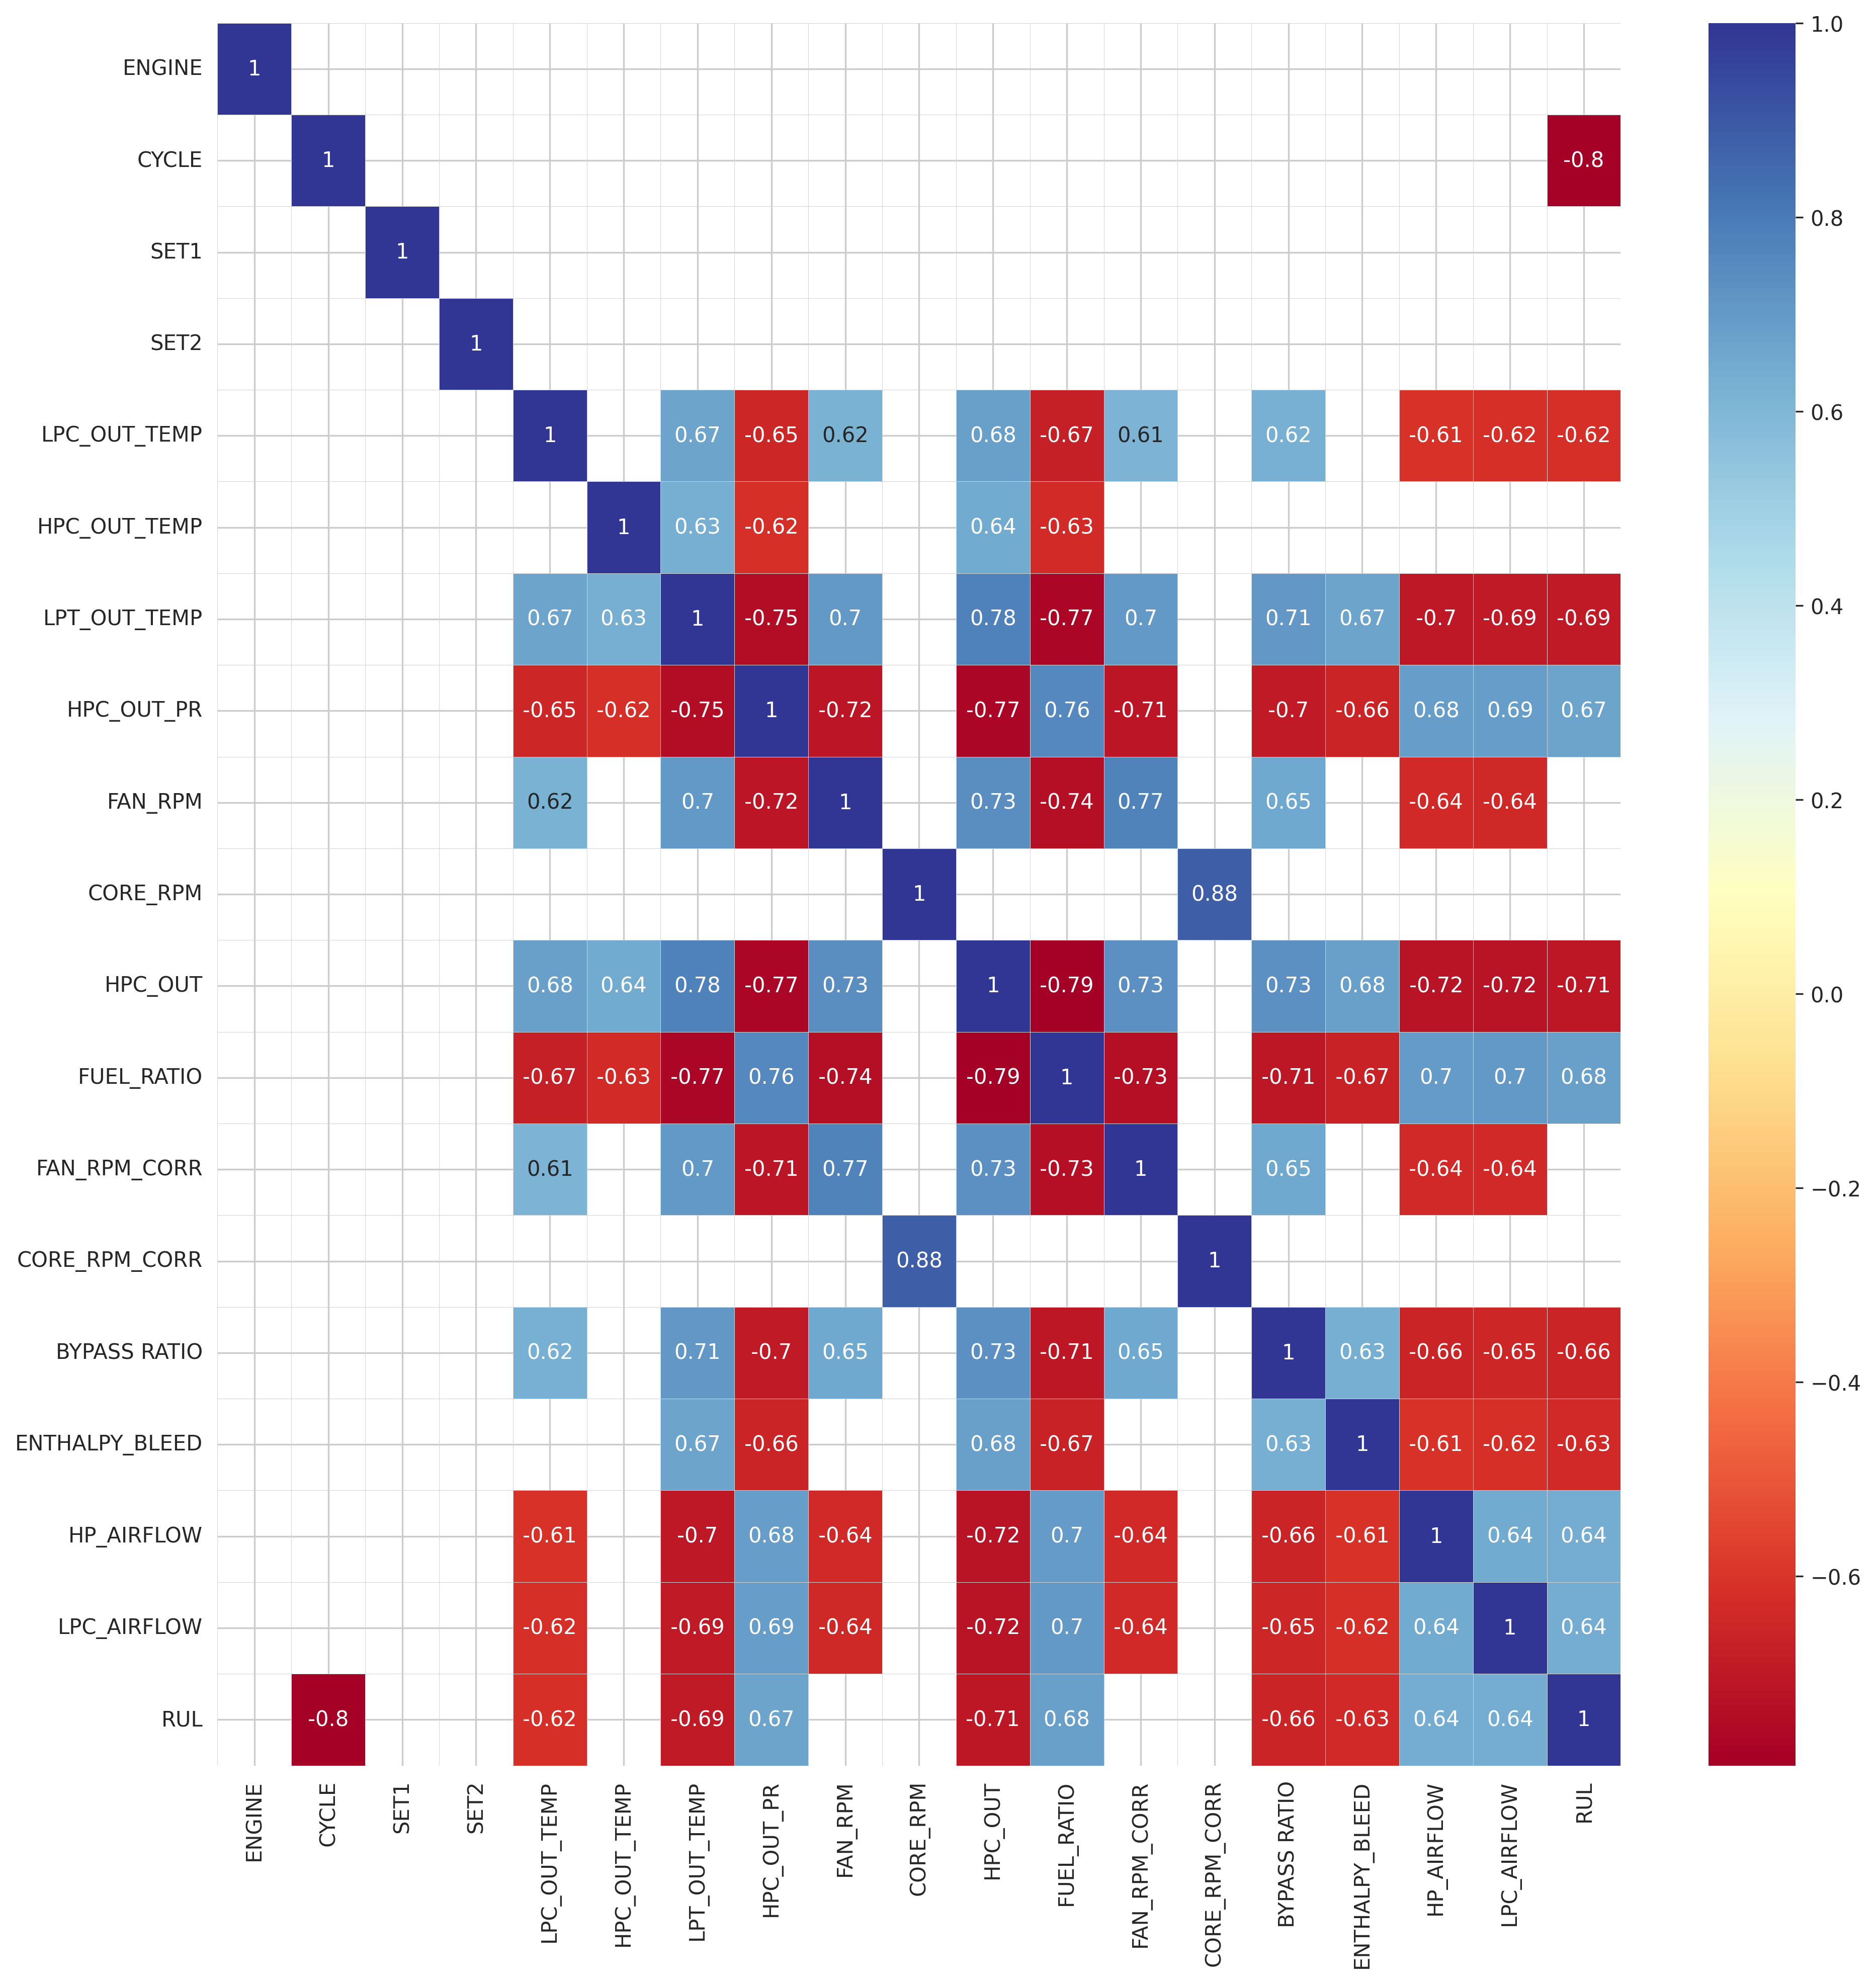

In [ ]:
plt.figure(figsize=(15,15),dpi=300)
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train1.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')


In [ ]:
data_train1.drop(columns=['ENGINE','SET1','SET2','CORE_RPM',"CORE_RPM_CORR"], inplace=True)

In [ ]:
list(data_train1)


['CYCLE',
 'LPC_OUT_TEMP',
 'HPC_OUT_TEMP',
 'LPT_OUT_TEMP',
 'HPC_OUT_PR',
 'FAN_RPM',
 'HPC_OUT',
 'FUEL_RATIO',
 'FAN_RPM_CORR',
 'BYPASS RATIO',
 'ENTHALPY_BLEED',
 'HP_AIRFLOW',
 'LPC_AIRFLOW',
 'RUL']

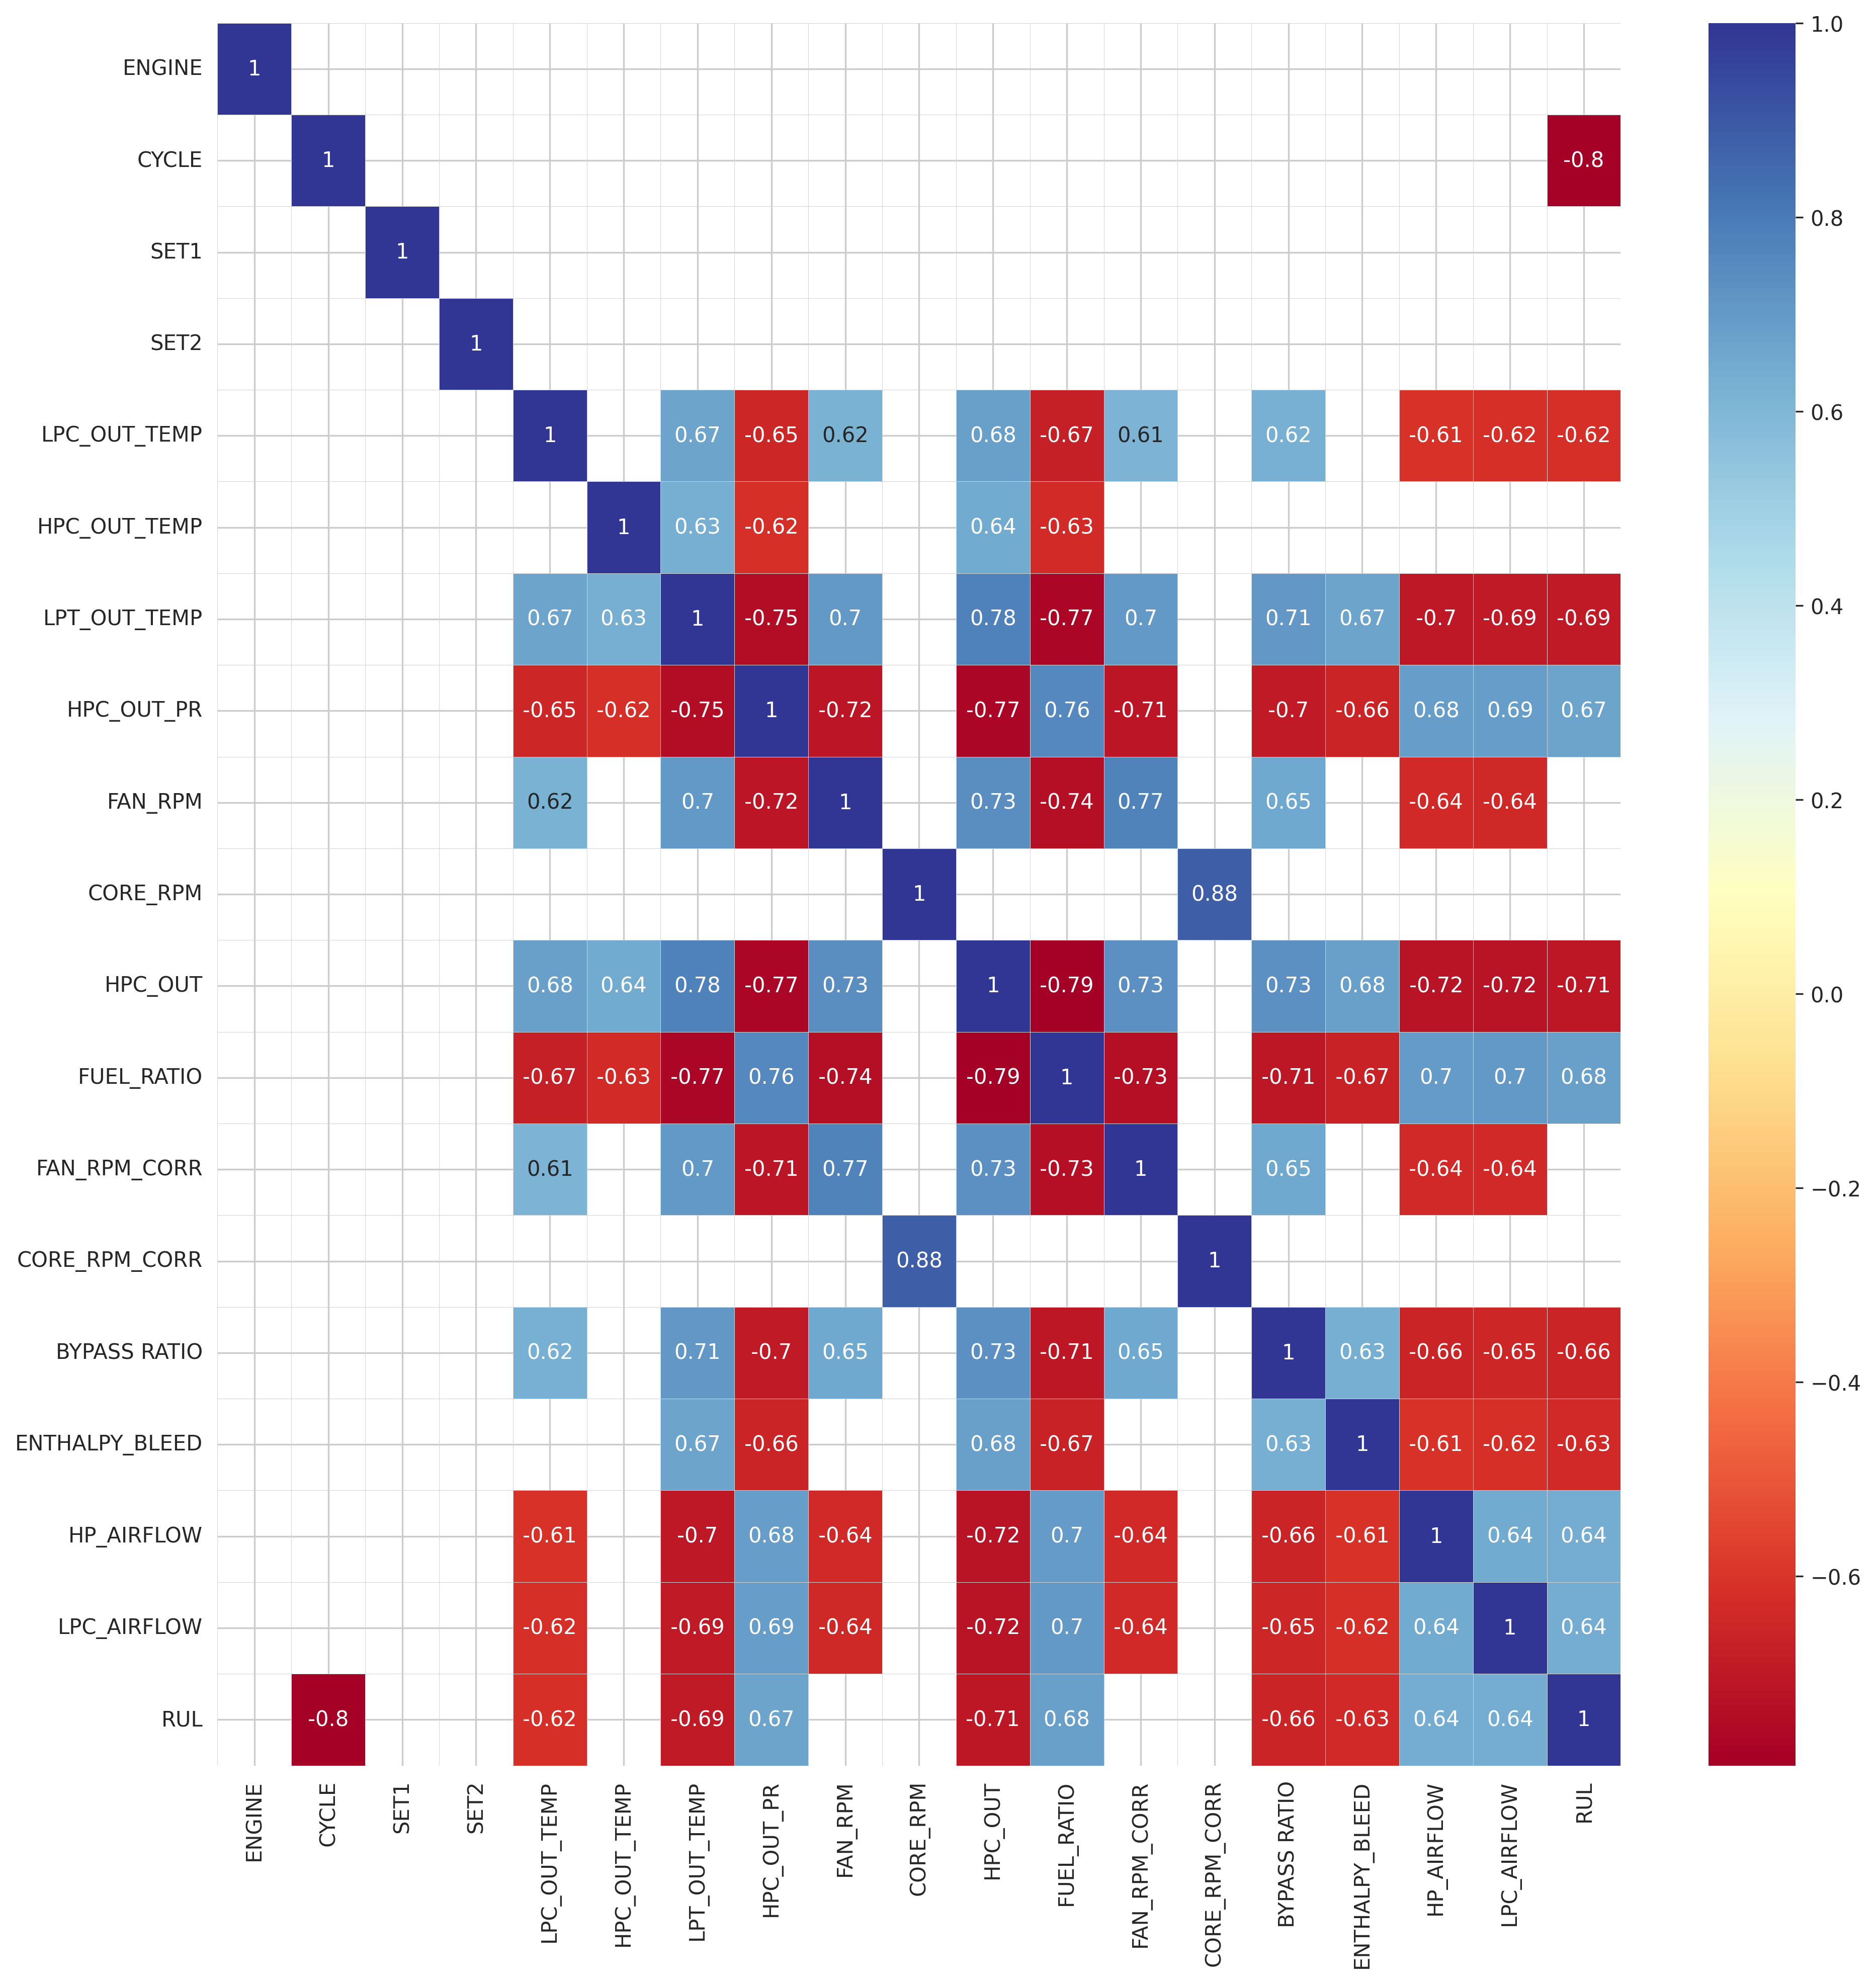

In [ ]:
plt.figure(figsize=(15,15),dpi=300)
threshold = 0.6
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data_train1.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
data_train1.drop(columns=["HPC_OUT_TEMP","FAN_RPM","FAN_RPM_CORR"], inplace=True)

In [ ]:
max_values = data_train1['RUL'].max()  # Find the maximum value in the column

# Remove rows where the specific column is equal to the maximum value
data_train1 = data_train1[data_train1['RUL'] != max_values]

<Figure size 1000x1000 with 0 Axes>

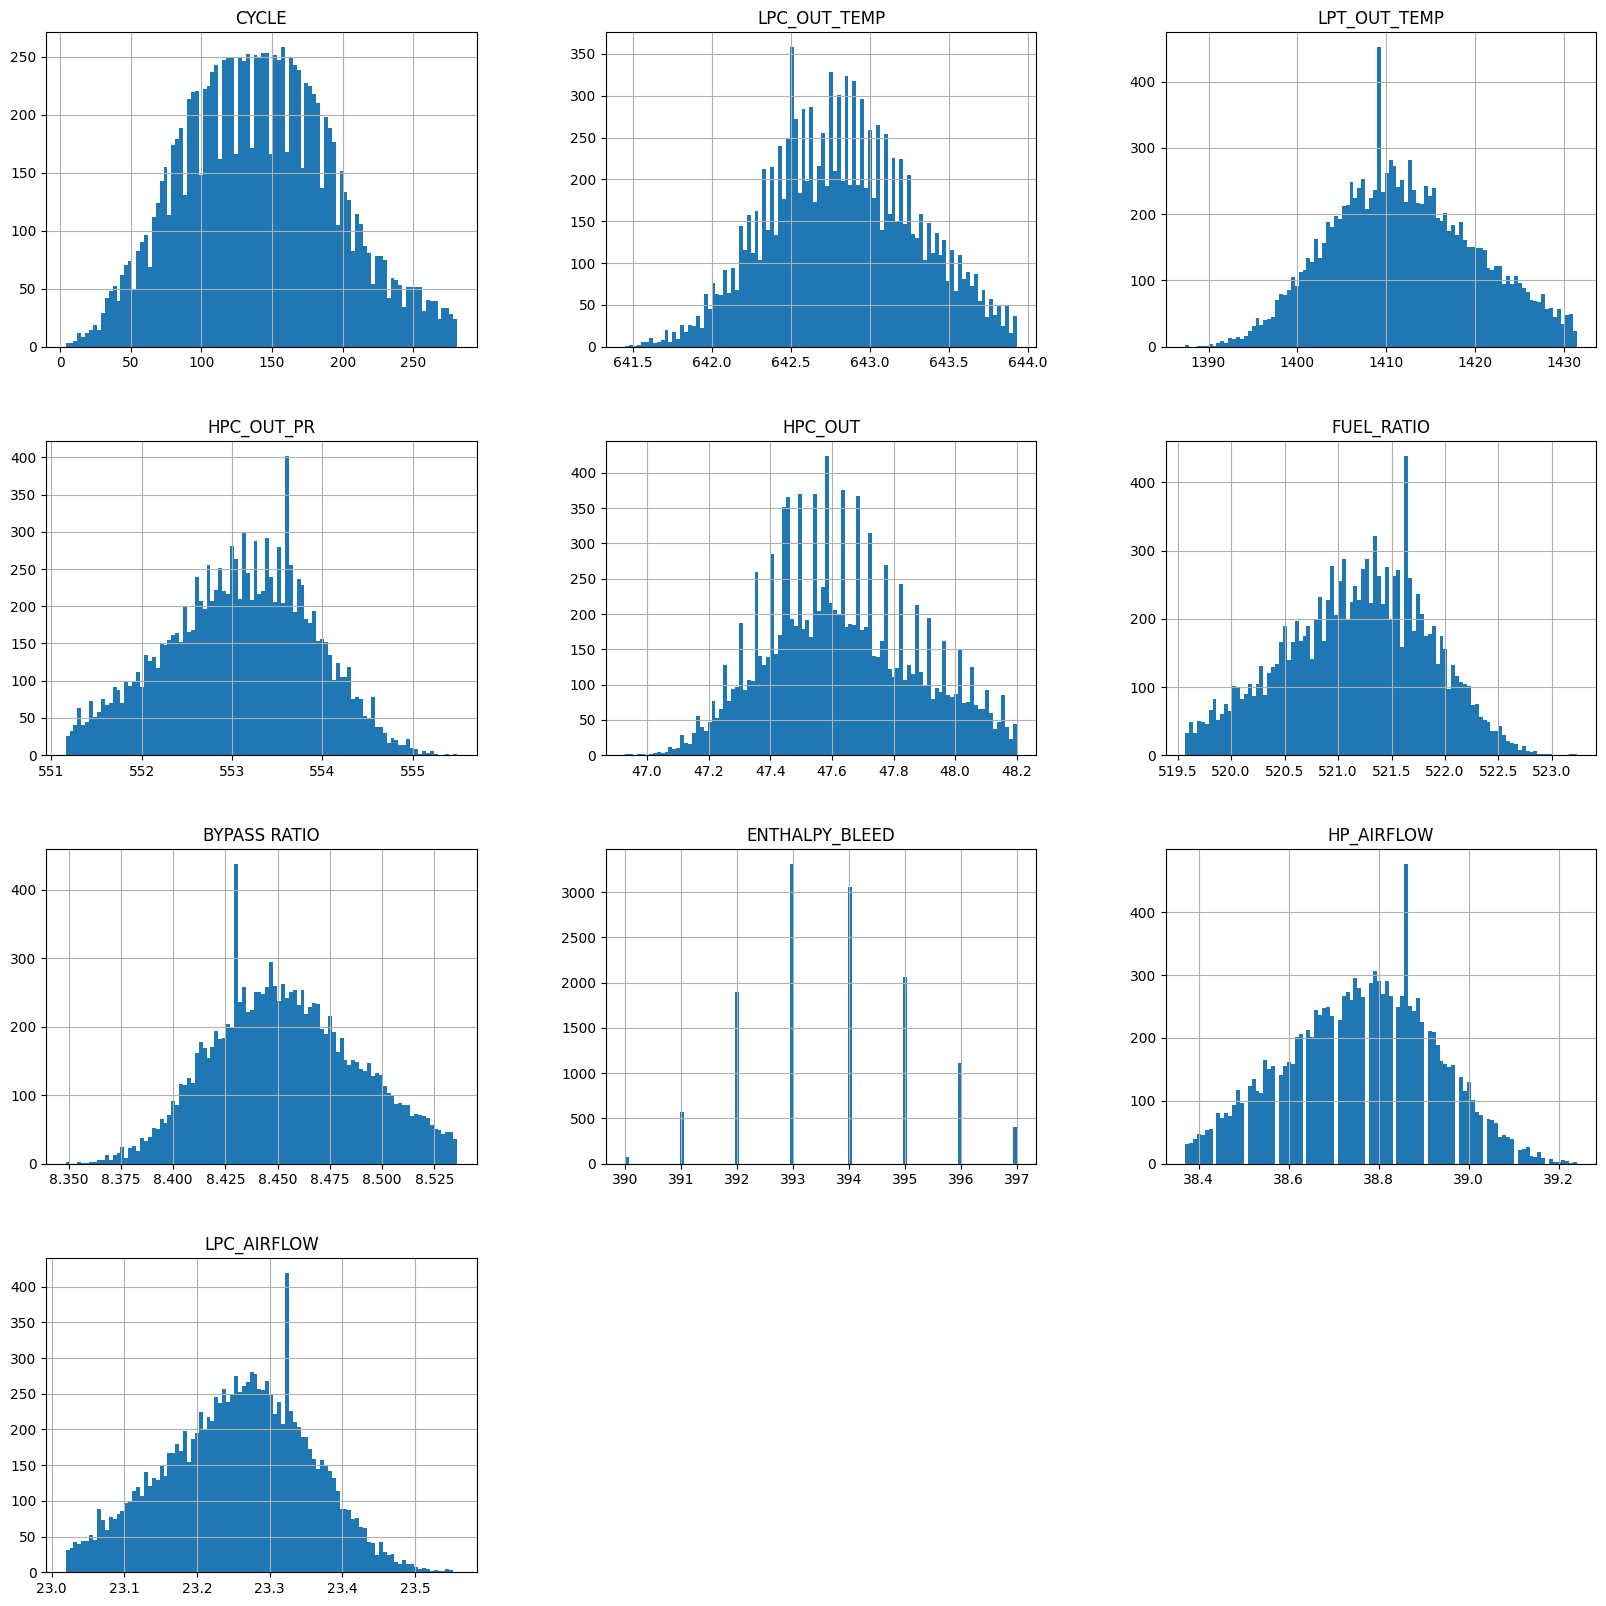

In [ ]:
plt.figure(figsize=(10,10))
data_train1.drop(columns=['RUL']).hist(bins=100, figsize=(20, 20))
plt.gca().set_facecolor('white') # Set the current ax

In [ ]:
x= data_train1.iloc[:, :-1]
y = data_train1.iloc[:,-1].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)
y1 = sc.fit_transform(y.reshape(-1,1))
y = y1.reshape(-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error

estimators = [LinearRegression(),
              RandomForestRegressor(),
              DecisionTreeRegressor(), KNeighborsRegressor(),GradientBoostingRegressor(),SVR()]

estimator_names = []
mses = []
rmses = []
r2s = []
acc = []

for esti in estimators:
    esti.fit(x_train, y_train)
    y_pred = esti.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    estimator_names.append(esti.__class__.__name__)
    mses.append(mse)
    rmses.append(rmse)
    r2s.append(r2)
    # cv_mean.append(training_score)

column_width = 30

header = f"{'Model'.center(column_width)}|{'MSE'.center(column_width)}|{'RMSE'.center(column_width)}|{'R2 Score'.center(column_width)}"
print(header)
print("-" * len(header))

for name, mse, rmse, r2 in zip(estimator_names, mses, rmses, r2s):
    print(f"{name.center(column_width)}|{str(mse).center(column_width)}|{str(rmse).center(column_width)}|{str(r2).center(column_width)}")

            Model             |             MSE              |             RMSE             |           R2 Score           
---------------------------------------------------------------------------------------------------------------------------
       LinearRegression       |     0.023398562446924946     |     0.15296588654639617      |      0.7253063276686915      
    RandomForestRegressor     |     0.020372462499999997     |     0.14273213548462027      |      0.7608320361026144      
    DecisionTreeRegressor     |     0.041670707596253895     |     0.20413404320753042      |      0.510795600190239       
     KNeighborsRegressor      |     0.02361448178980229      |     0.15367004193987288      |      0.7227714848826496      
  GradientBoostingRegressor   |     0.020098565136590116     |      0.1417694083241872      |      0.7640475273434795      
             SVR              |     0.02029785207071945      |     0.14247053053428085      |      0.7617079451615482      


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [5,6],
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator for further predictions
best_estimator = grid_search.best_estimator_


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score (negative MSE): -0.019912747937451073


In [ ]:
from sklearn.decomposition import PCA
def DimRed_PCA(var,comp):
    pca = PCA(n_components=comp)
    pca_result = pca.fit_transform( var)
    return pca_result
pca = DimRed_PCA(x_train,2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal

x_train = x_train
y_train = y_train
f1model = Sequential()
f1model.add(Dense(np.shape(x_train)[1], kernel_initializer='he_normal', input_dim=np.shape(x_train)[1], activation='relu'))
f1model.add(BatchNormalization())

# Simplified Hidden Layers with non-linear activations:
f1model.add(Dense(5, kernel_initializer='normal', activation='relu'))
f1model.add(Dropout(0.2))
f1model.add(Dense(2, kernel_initializer='normal', activation='relu'))
f1model.add(Dropout(0.2))
f1model.add(Dense(1, kernel_initializer='normal', activation='linear'))


# The Output Layer :

# Compile the network :
f1model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
f1model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 2)                 12        
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                      

In [ ]:
# checkpoints = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks' + '/' +'mlp-weights.best' + '.hdf5', monitor='loss', save_best_only=True, verbose=1, mode='min')
# callbacks_list = [checkpoints]
# history = f1model.fit(x_train, y_train, validation_split=0.05, epochs=100, batch_size=5, callbacks=callbacks_list)